In [6]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 72.0 MB/s et

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('car data (1).csv')

data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.drop('Car_Name', axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [12]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [17]:
data['Present_Price'].describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

<ipython-input-18-ed36d65be39b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Present_Price'])


(0.0, 160.0)

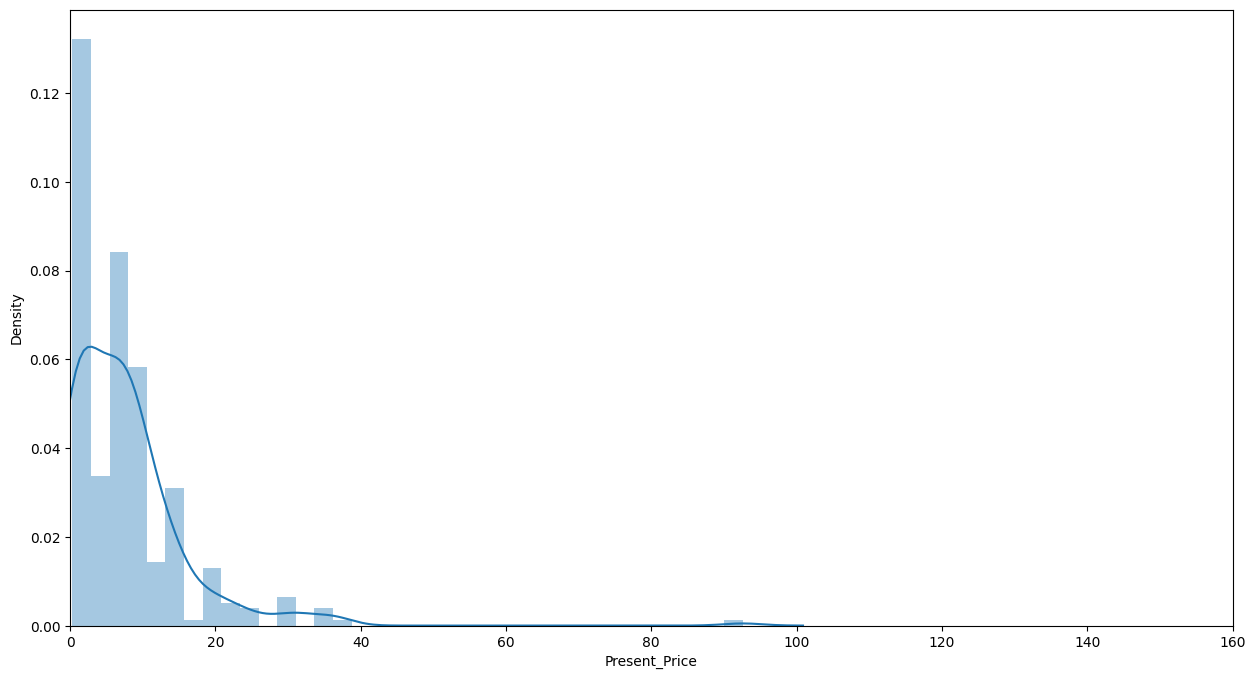

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(15,8))
sns.distplot(data['Present_Price'])
plt.xlim([0,160])

In [19]:
data['Fuel_Type'].describe()

count        301
unique         3
top       Petrol
freq         239
Name: Fuel_Type, dtype: object

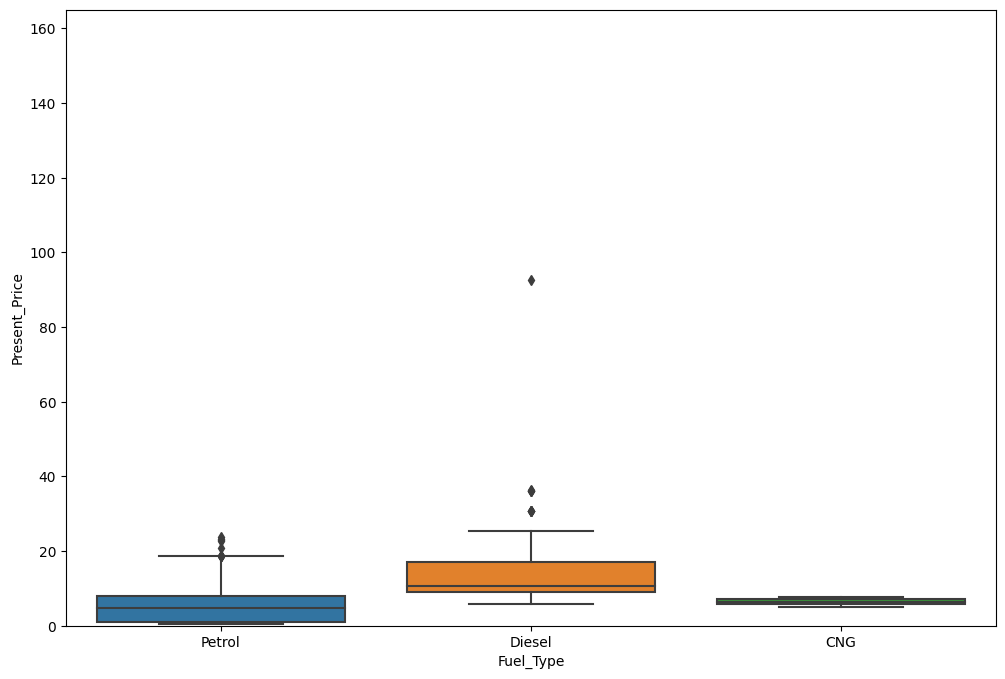

In [20]:
var = 'Fuel_Type'
data = pd.concat([data['Present_Price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Present_Price", data=data)
fig.axis(ymin=0, ymax=165);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


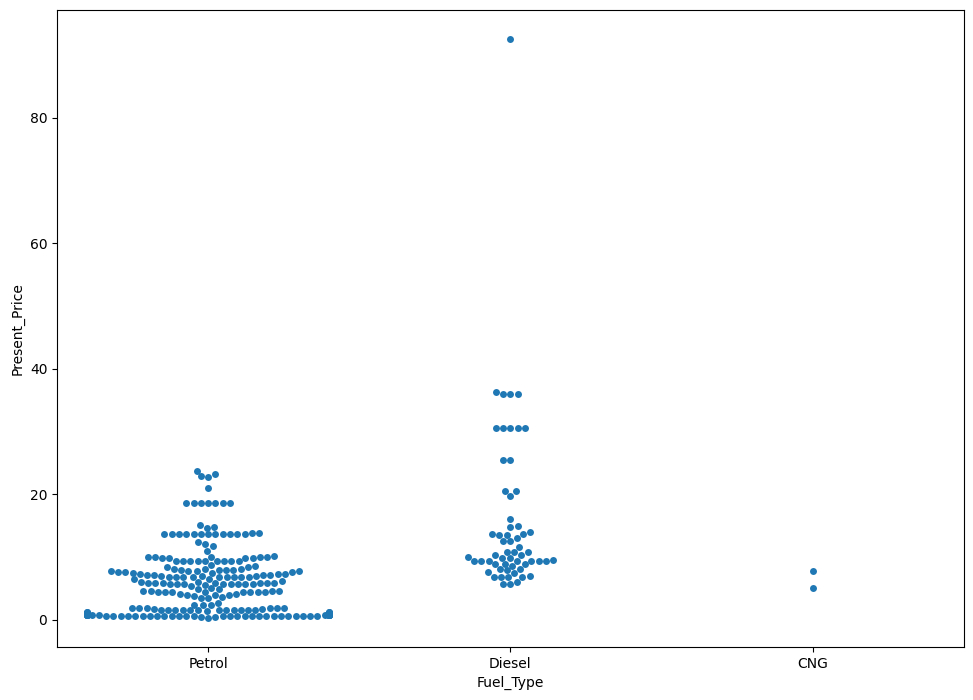

In [21]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Present_Price', data = data)

<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

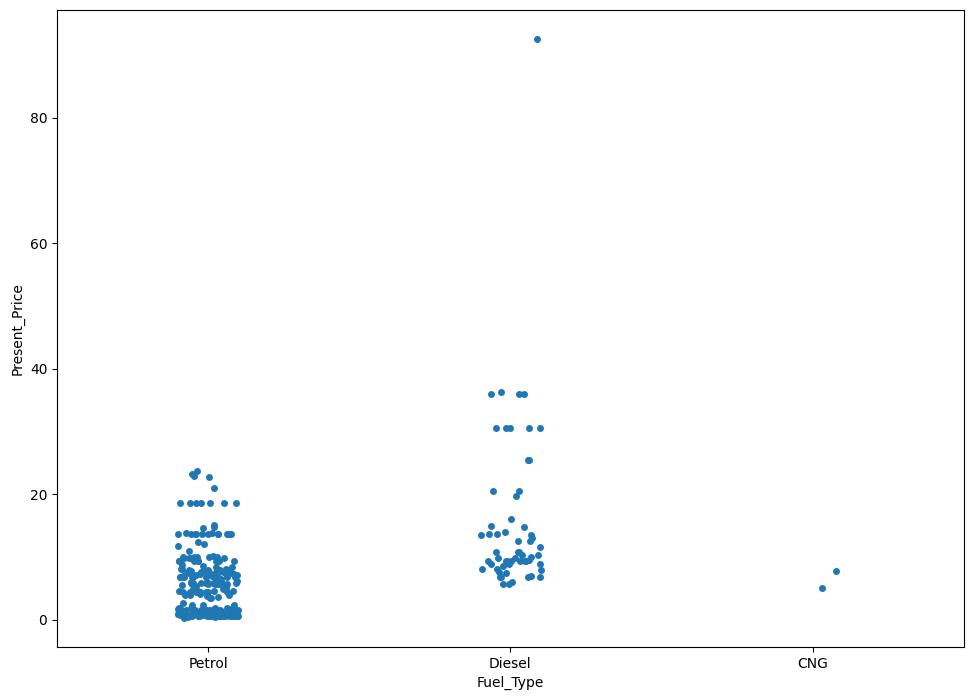

In [32]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Present_Price', data = data)

<Figure size 2000x1000 with 0 Axes>

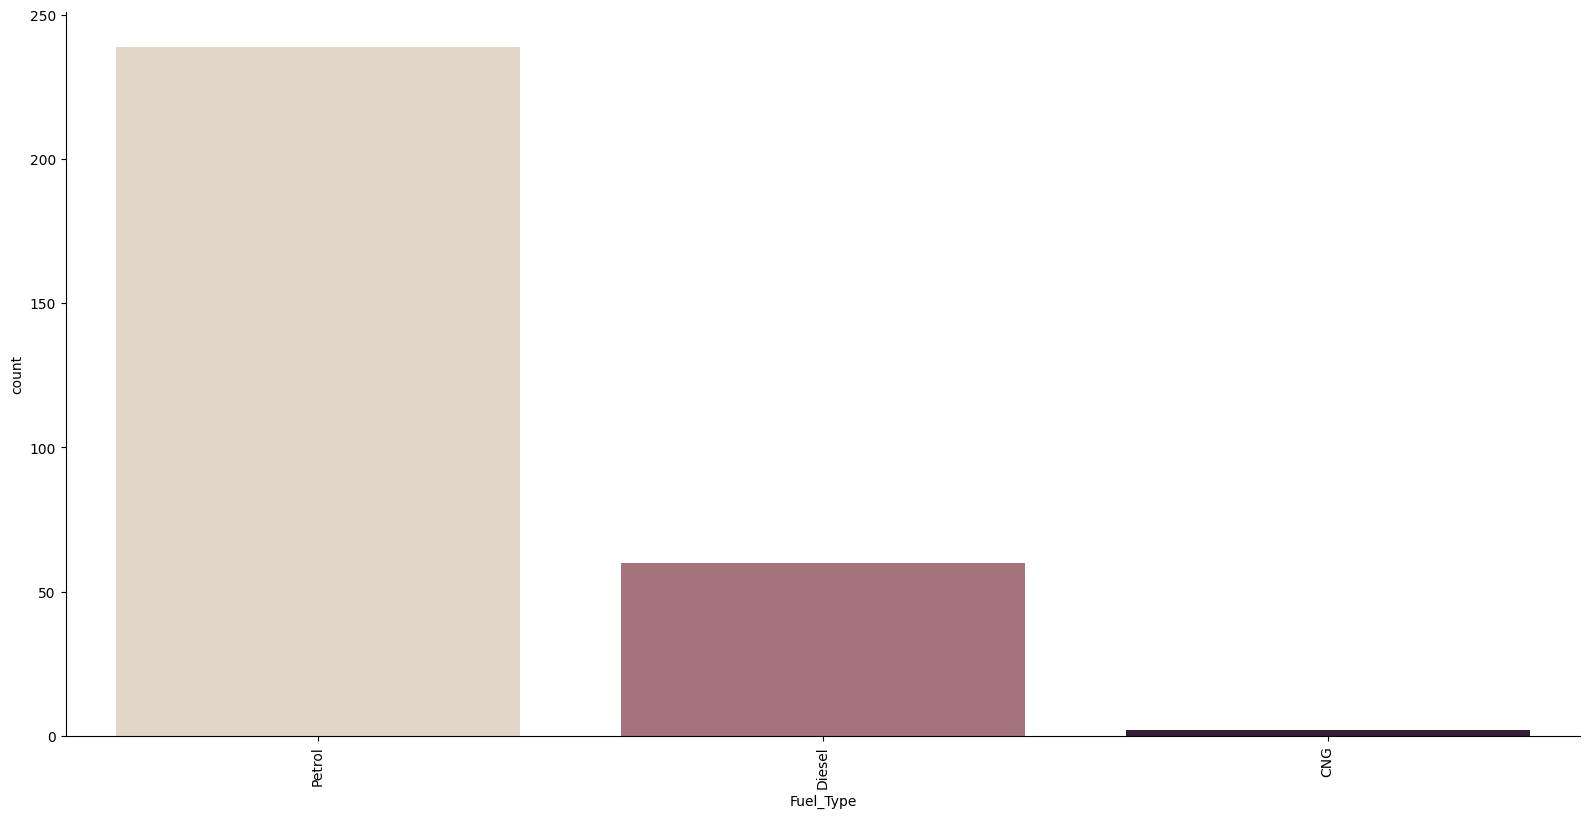

In [36]:
var = "Fuel_Type"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=data);
plt.xticks(rotation=90);

In [46]:
#missing values
data.isna().sum()

Present_Price    0
Fuel_Type        0
dtype: int64

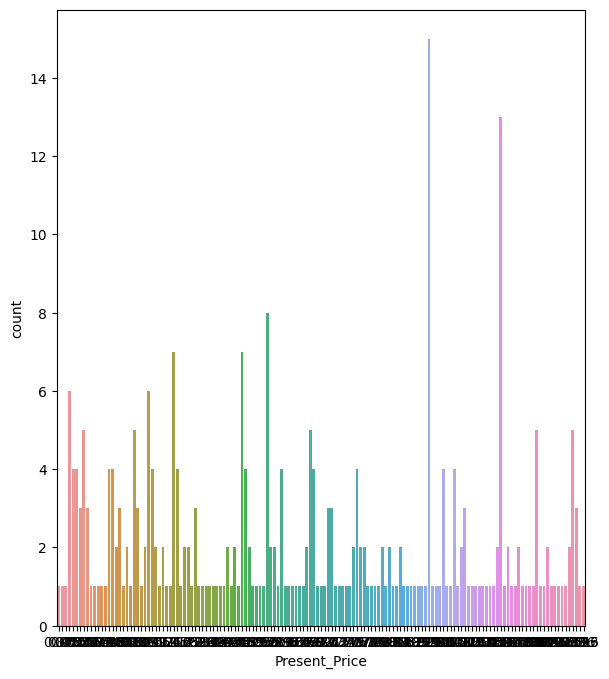

In [67]:
fig = plt.figure(figsize=[15,8])
ax1 = fig.add_subplot(121)
sns.countplot(x="Present_Price", data=data)
plt.show()

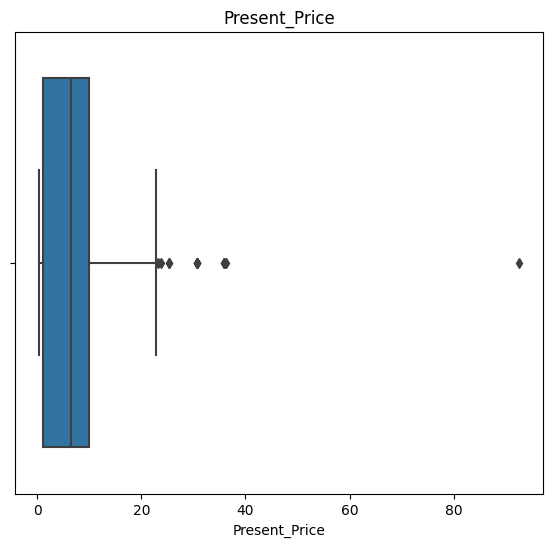

In [77]:
fig = plt.figure(figsize=[15,6])
ax1 = fig.add_subplot(121)
ax1.title.set_text('Present_Price')
sns.boxplot(x='Present_Price', data=data)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encoder.fit_transform(data[col])

In [ ]:
from pycaret.regression import *
s = setup(data = data, target = 'Selling_Price', session_id=123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,Selling_Price
2,Target type,Regression
3,Original data shape,"(301, 8)"
4,Transformed data shape,"(301, 8)"
5,Transformed train set shape,"(210, 8)"
6,Transformed test set shape,"(91, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7076,3.1121,1.4489,0.8970,0.1525,0.1957,0.0620
et,Extra Trees Regressor,0.7343,3.6447,1.5872,0.8879,0.1658,0.1799,0.1400
gbr,Gradient Boosting Regressor,0.7611,4.2800,1.5929,0.8709,0.1649,0.2120,0.0620
rf,Random Forest Regressor,0.7805,3.7401,1.6335,0.8445,0.1604,0.1963,0.3010
br,Bayesian Ridge,1.1933,4.7346,2.0049,0.8282,0.3330,1.1020,0.0190
ridge,Ridge Regression,1.2045,4.6691,2.0024,0.8265,0.3328,1.1238,0.0190
lr,Linear Regression,1.2147,4.6753,2.0085,0.8239,0.3339,1.1392,0.4700
lar,Least Angle Regression,1.2105,5.2585,2.0518,0.8197,0.3316,1.1291,0.0200
ada,AdaBoost Regressor,1.1149,5.0509,1.9419,0.8146,0.2921,0.7470,0.0780
en,Elastic Net,1.3135,5.6397,2.1510,0.8120,0.3625,1.0018,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6089,1.0659,1.0324,0.9577,0.1439,0.1599
1,1.1037,5.2388,2.2888,0.5818,0.3311,0.4111
2,0.7157,1.2973,1.1390,0.9542,0.1337,0.2962
3,0.7077,1.1908,1.0912,0.9621,0.1645,0.1849
4,0.3832,0.2694,0.5191,0.9917,0.0860,0.0866
5,0.3811,0.3398,0.5829,0.9672,0.1218,0.1944
6,1.1560,15.2098,3.9000,0.7574,0.1702,0.0959
7,0.3588,0.2935,0.5417,0.9655,0.0960,0.1856
8,0.9021,4.7292,2.1747,0.9043,0.1263,0.1729


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
x = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [ ]:
yr = int(input('Enter Year of buying car : '))
price = float(input('Enter Present Price of Car : '))
kms = int(input('Enter Kms Driven by car : '))
ft = int(input('Enter Fuel Type : '))
st = int(input('Enter Seller Type : '))
trans = int(input('Enter Transmission type : '))
owner = int(input('Enter Owner Type : '))

Enter Year of buying car : 2003
Enter Present Price of Car : 45000
Enter Kms Driven by car : 14
Enter Fuel Type : 10
Enter Seller Type : 1
Enter Transmission type : 0
Enter Owner Type : 1


In [ ]:
import numpy as np

user_data = np.array([[yr, price, kms, ft, st, trans, owner]])

prediction = model.predict(user_data)[0]

print('Predicted Used Car Price : ₹', prediction, 'Lakhs')

Predicted Used Car Price : ₹ 34.93141 Lakhs


In [ ]:
import pickle

with open('used_cars_prediction.pkl', 'wb') as file:
  pickle.dump(model, file)